Libraries imported successfully.

Loading dataset from '/content/air_quality_health_dataset.csv'...
Dataset loaded successfully!

--- First 5 Rows ---
          city        date  aqi  pm2_5  pm10   no2    o3  temperature  \
0  Los Angeles  2020-01-01   65   34.0  52.7   2.2  38.5         33.5   
1      Beijing  2020-01-02  137   33.7  31.5  36.7  27.5         -1.6   
2       London  2020-01-03  266   43.0  59.6  30.4  57.3         36.4   
3  Mexico City  2020-01-04  293   33.7  37.9  12.3  42.7         -1.0   
4        Delhi  2020-01-05  493   50.3  34.8  31.2  35.6         33.5   

   humidity  hospital_admissions population_density  hospital_capacity  
0        33                    5              Rural               1337  
1        32                    4              Urban               1545  
2        25                   10           Suburban               1539  
3        67                   10              Urban                552  
4        72                    9           Su

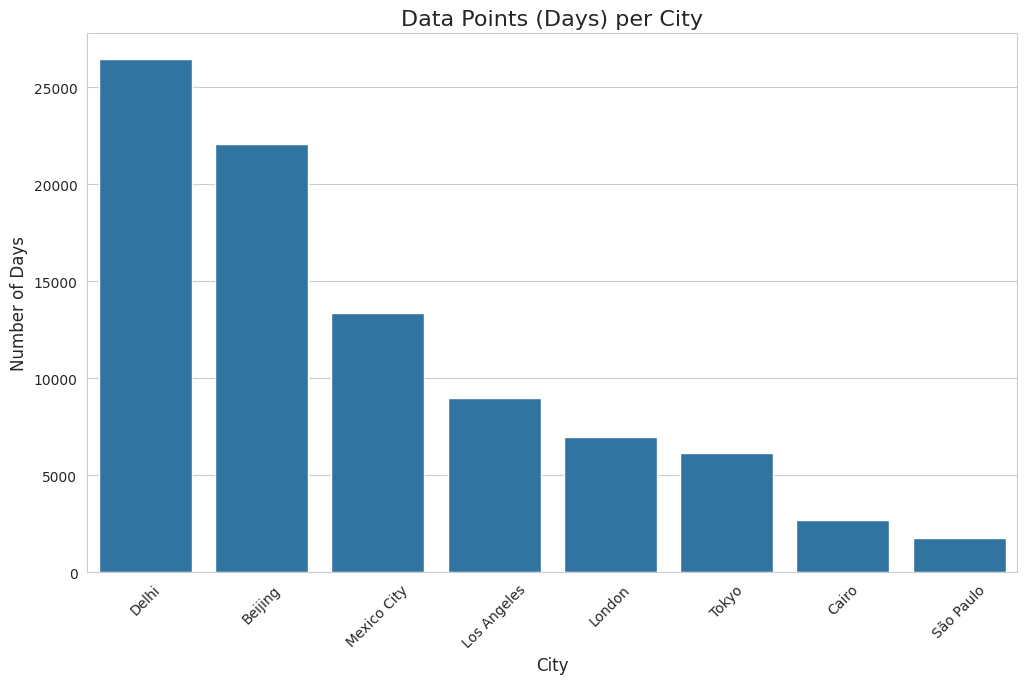


--- 🚀 Our 4 Federated Clients will be: ['Delhi', 'Beijing', 'Mexico City', 'Los Angeles'] ---

--- Analyzing Key Numerical Features ---
Plotting histograms...


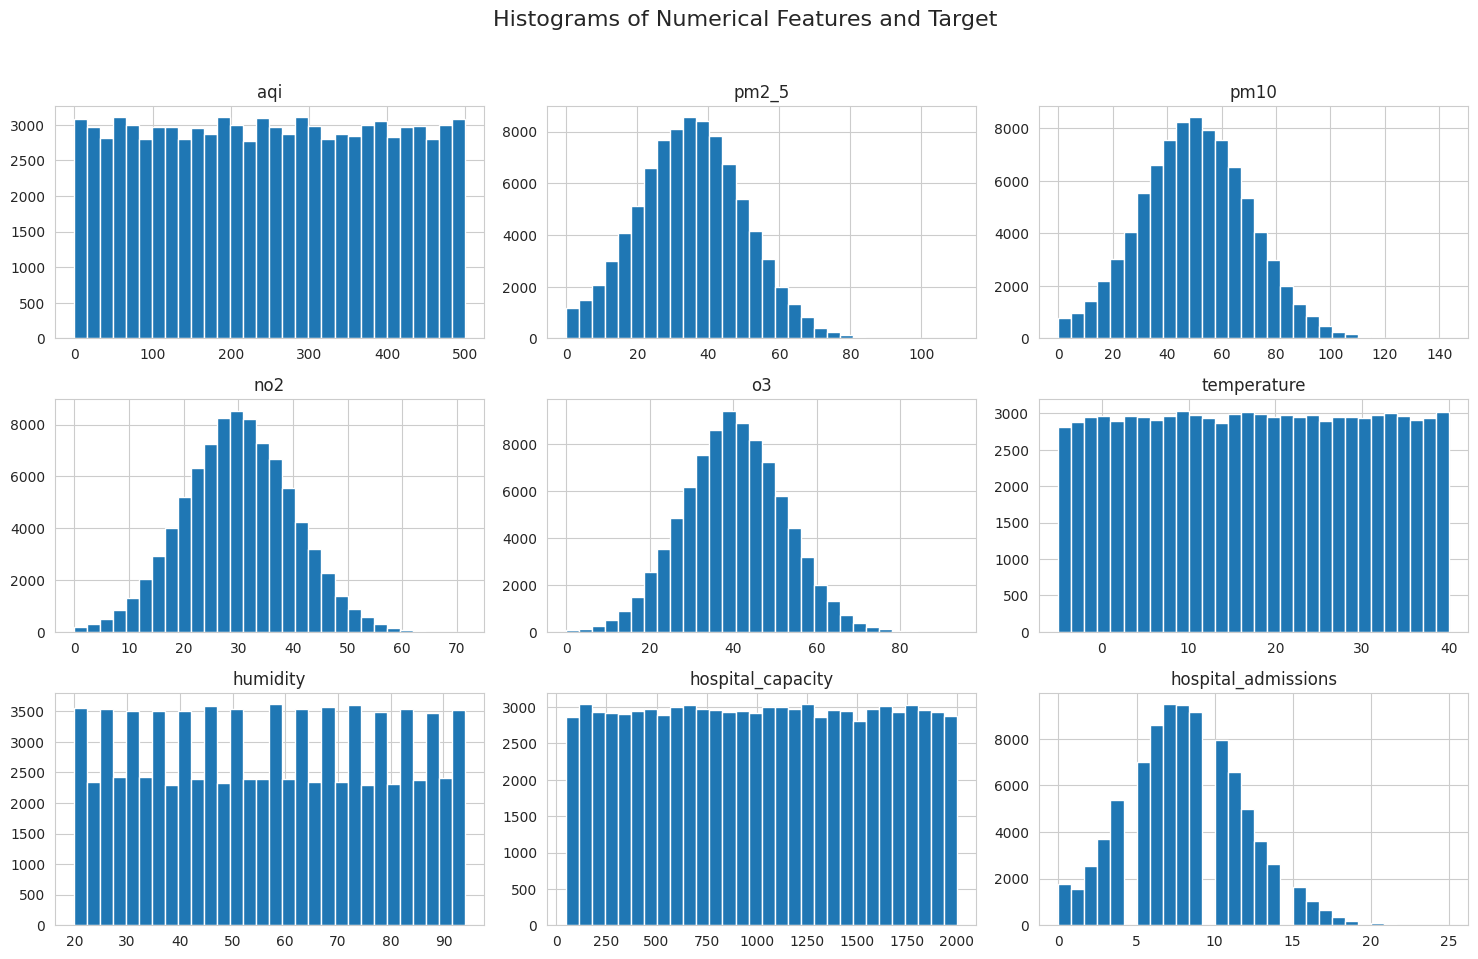


Plotting boxplots...


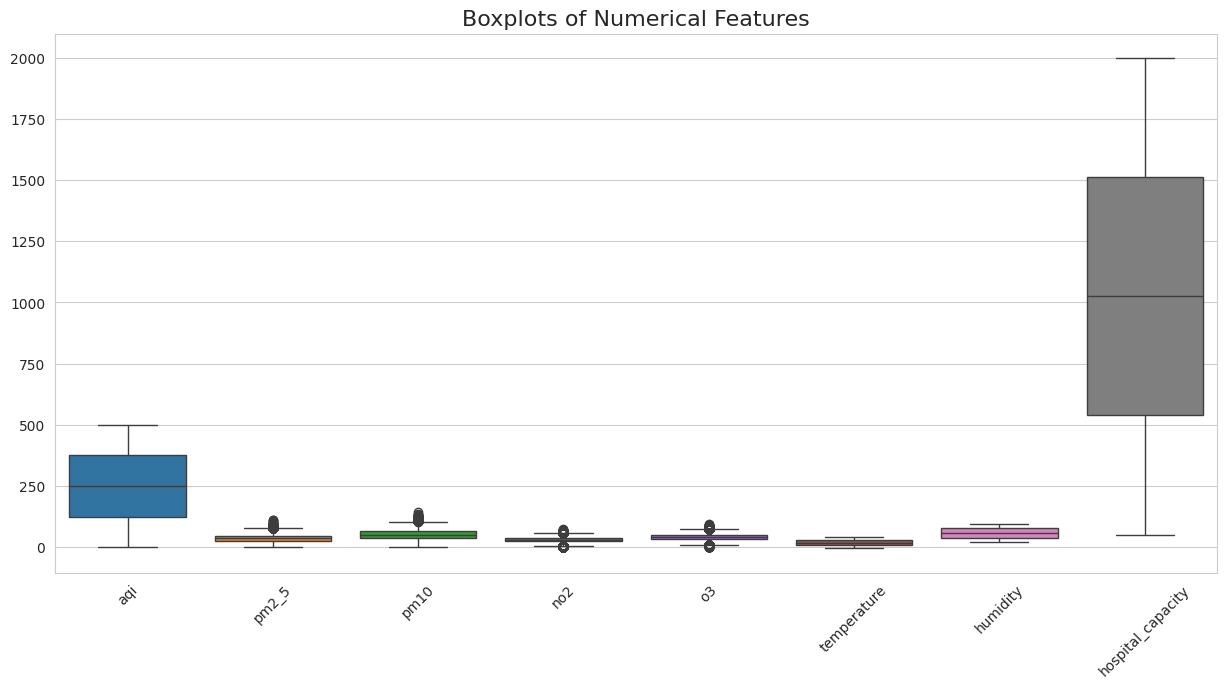

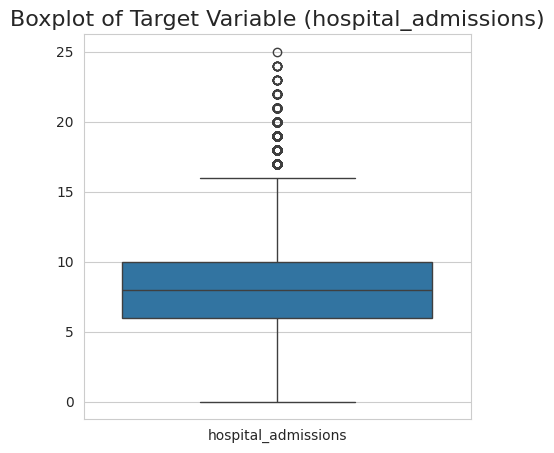


--- Analyzing Categorical 'Text' Feature ---
Value counts for 'population_density':
population_density
Urban       53192
Suburban    26465
Rural        8832
Name: count, dtype: int64


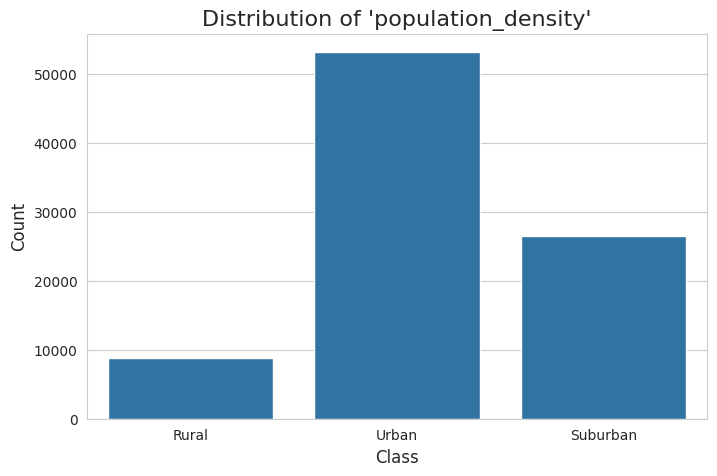


--- Correlation Heatmap ---


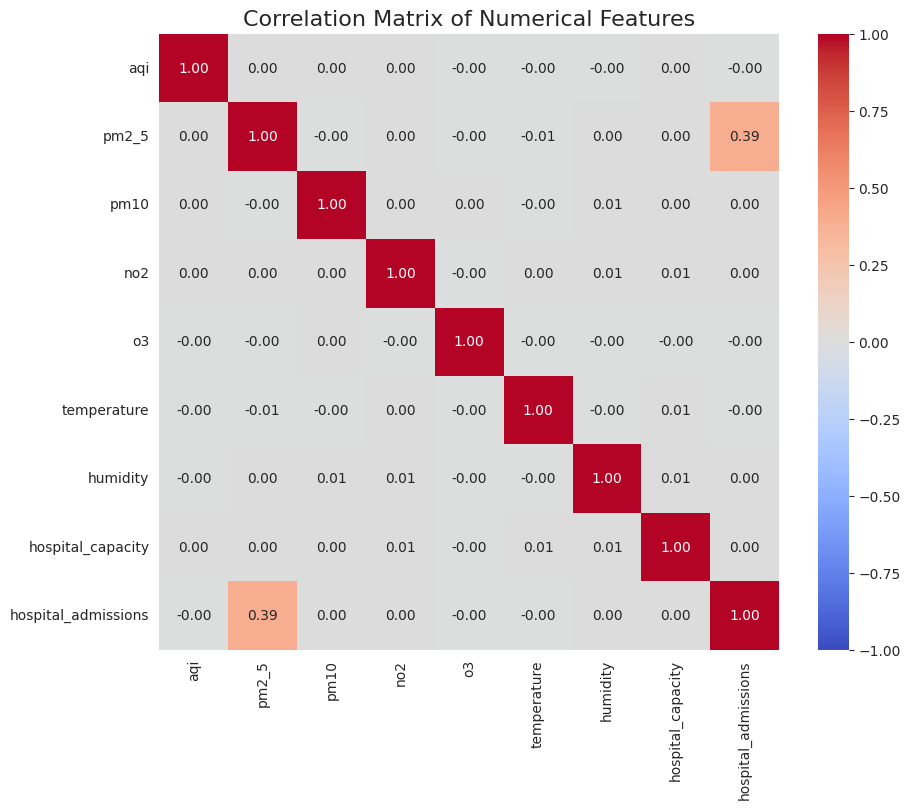


--- Correlation with Target (hospital_admissions) ---
hospital_admissions    1.000000
pm2_5                  0.392309
hospital_capacity      0.001533
no2                    0.001279
pm10                   0.000537
humidity               0.000010
aqi                   -0.000393
o3                    -0.003032
temperature           -0.003783
Name: hospital_admissions, dtype: float64

--- Plotting Time Series for our first client: Delhi ---


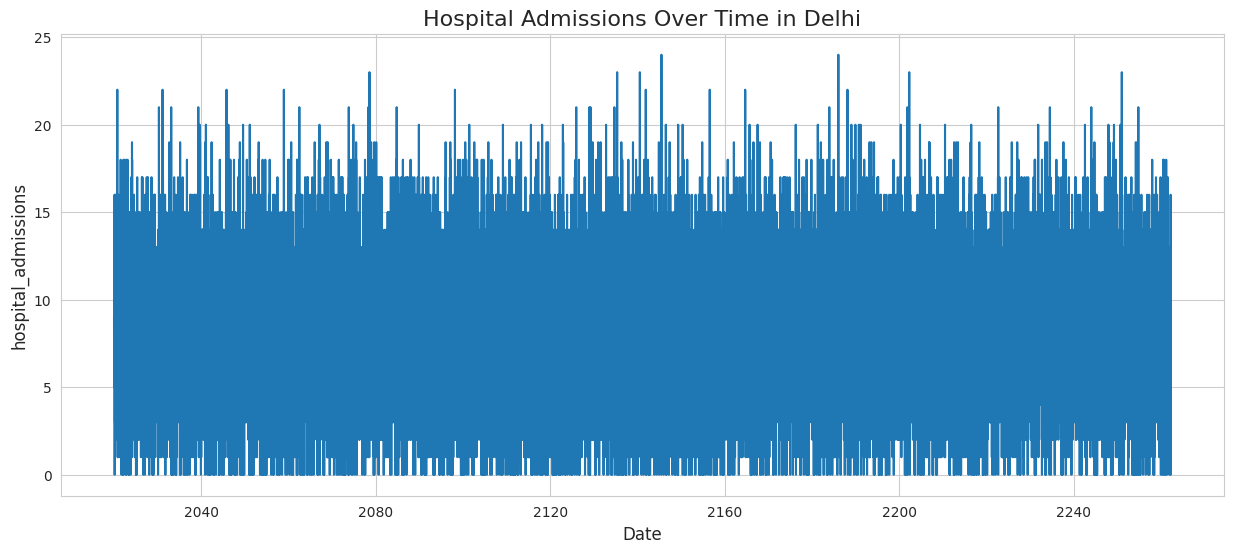


✅ EDA Complete: Project Plan Summary

1. Federated Clients:
   - We will use the 4 cities with the most data:
   - Client 1: Delhi (26465 days of data)
   - Client 2: Beijing (22064 days of data)
   - Client 3: Mexico City (13377 days of data)
   - Client 4: Los Angeles (9003 days of data)

2. Target Variable (Y):
   - Our model will predict: 'hospital_admissions'

3. Multi-Modal Features (X):
   - ✅ Time Series / Numerical Data:
      - ['aqi', 'pm2_5', 'pm10', 'no2', 'o3', 'temperature', 'humidity', 'hospital_capacity']
   - ✅ Text Data (for Embedding Layer):
      - 'population_density' (Categories: ['Rural', 'Urban', 'Suburban'])
   - ✅ Image Data (Simulated):
      - We will take our 8 numerical features...
      - ...and reshape them into a small 'image' (e.g., 2x4 pixels)...
      - ...to be fed into a 2D-CNN.

--- NEXT STEP: Phase 2 (Model Development) ---
We are now ready to build our multi-modal model and the Flower (flwr) federated learning system.


In [ ]:
# # ==============================================================================
# #
# #  MLOps Project: Federated Health Risk Prediction
# #  FILE: 1.0_EDA.ipynb
# #  PURPOSE: Load, inspect, and analyze the dataset to plan our
# #           Federated Learning (FL) client strategy and multi-modal model.
# #
# # ==============================================================================

# # --- Cell 1: Import Libraries ---
# # Import all the necessary libraries for data analysis and visualization.
# # ---
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import os

# # Set a style for our plots
# sns.set_style("whitegrid")
# print("Libraries imported successfully.")


# # --- Cell 2: Load the Dataset ---
# # Load the single CSV file that will power our entire project.
# # ---

# # Define the path to your data file
# DATA_FILE_PATH = '/content/air_quality_health_dataset.csv'

# # Check if the file exists and load it
# if not os.path.exists(DATA_FILE_PATH):
#     print(f"--- ERROR ---")
#     print(f"File not found at '{DATA_FILE_PATH}'")
#     print("Please make sure you have downloaded the dataset and placed it in a 'data/' folder next to this notebook.")
# else:
#     print(f"\nLoading dataset from '{DATA_FILE_PATH}'...")
#     df = pd.read_csv(DATA_FILE_PATH)
#     print("Dataset loaded successfully!")

#     # Display the first few rows to see what it looks like
#     print("\n--- First 5 Rows ---")
#     print(df.head())


# # --- Cell 3: Initial Data Inspection ---
# # Get a high-level overview of our data: column names, data types, and missing values.
# # ---
# if 'df' in locals():
#     print("\n--- Dataset Info (Columns, Types, Non-Null Counts) ---")
#     df.info()

#     # We can see 'date' is an object (string), we should convert it to datetime
#     print("\nConverting 'date' column to datetime format...")
#     df['date'] = pd.to_datetime(df['date'])

#     print("\n--- Info After Date Conversion ---")
#     df.info()
# else:
#     print("\nDataset not loaded. Please fix Cell 2.")


# # --- Cell 4: Check for Missing Values ---
# # Let's see if we have any gaps in our data.
# # ---
# if 'df' in locals():
#     print("\n--- Missing Values Check (Sum per Column) ---")
#     missing_values = df.isnull().sum()
#     print(missing_values)

#     if missing_values.sum() == 0:
#         print("\n✅ Excellent! No missing values found in the dataset.")
#     else:
#         print("\nWarning: Missing values detected. We may need to fill or drop them.")
#         # For this project, we'll keep it simple and fill with the mean (if any)
#         # df = df.fillna(df.mean(numeric_only=True))
#         # print("Missing values filled with column mean.")
# else:
#     print("\nDataset not loaded. Please fix Cell 2.")


# # --- Cell 5: 🏆 CLIENT SELECTION (The Most Important Step) ---
# # We need to find out which cities have the most data.
# # These will become our "Local Clients" in the Federated Learning setup.
# # ---
# if 'df' in locals():
#     print("\n--- Data Distribution per City (Our 'Clients') ---")

#     city_counts = df['city'].value_counts()

#     print("Here's how many data points (days) we have for each city:")
#     print(city_counts)

#     # Let's visualize this
#     plt.figure(figsize=(12, 7))
#     sns.barplot(x=city_counts.index, y=city_counts.values)
#     plt.title('Data Points (Days) per City', fontsize=16)
#     plt.ylabel('Number of Days', fontsize=12)
#     plt.xlabel('City', fontsize=12)
#     plt.xticks(rotation=45)
#     plt.show()

#     # Based on the output, we'll select the top cities
#     # We will choose the top 4 (or 3, if the numbers drop off)
#     SELECTED_CITIES = city_counts.head(4).index.tolist()
#     print(f"\n--- 🚀 Our {len(SELECTED_CITIES)} Federated Clients will be: {SELECTED_CITIES} ---")
# else:
#     print("\nDataset not loaded. Please fix Cell 2.")


# # --- Cell 6: Numerical Feature Analysis (Time Series Data) ---
# # Let's understand the distribution of our key numerical features and the target variable.
# # ---
# if 'df' in locals():
#     print("\n--- Analyzing Key Numerical Features ---")

#     # Define our key features and the target
#     # We'll include all numerical sensor/weather data
#     numerical_features = ['aqi', 'pm2_5', 'pm10', 'no2', 'o3', 'temperature', 'humidity', 'hospital_capacity']
#     target = 'hospital_admissions'

#     # Ensure all columns exist before trying to plot
#     valid_numerical_features = [col for col in numerical_features if col in df.columns]

#     # Plot histograms
#     print("Plotting histograms...")
#     df[valid_numerical_features + [target]].hist(bins=30, figsize=(15, 12), layout=(4, 3))
#     plt.suptitle("Histograms of Numerical Features and Target", y=1.02, fontsize=16)
#     plt.tight_layout()
#     plt.show()

#     # Plot boxplots to see outliers
#     print("\nPlotting boxplots...")
#     plt.figure(figsize=(15, 7))
#     sns.boxplot(data=df[valid_numerical_features])
#     plt.title("Boxplots of Numerical Features", fontsize=16)
#     plt.xticks(rotation=45)
#     plt.show()

#     plt.figure(figsize=(5, 5))
#     sns.boxplot(data=df[[target]])
#     plt.title("Boxplot of Target Variable (hospital_admissions)", fontsize=16)
#     plt.show()
# else:
#     print("\nDataset not loaded. Please fix Cell 2.")


# # --- Cell 7: Categorical Feature Analysis (Our "Text" Data) ---
# # This is the feature we'll feed into our Embedding Layer.
# # ---
# if 'df' in locals():
#     print("\n--- Analyzing Categorical 'Text' Feature ---")

#     text_feature = 'population_density'

#     if text_feature in df.columns:
#         print(f"Value counts for '{text_feature}':")
#         print(df[text_feature].value_counts())

#         # Visualize it
#         plt.figure(figsize=(8, 5))
#         sns.countplot(data=df, x=text_feature)
#         plt.title(f"Distribution of '{text_feature}'", fontsize=16)
#         plt.ylabel("Count", fontsize=12)
#         plt.xlabel("Class", fontsize=12)
#         plt.show()
#     else:
#         print(f"\nWarning: The column '{text_feature}' was not found.")
#         text_feature = None # Set to None so we can check later
#         print("We will proceed without this 'text' feature for now.")
#         print("If your dataset has a different categorical column, update the 'text_feature' variable.")
# else:
#     print("\nDataset not loaded. Please fix Cell 2.")


# # --- Cell 8: Correlation Analysis ---
# # Let's see how our features relate to each other and, most importantly,
# # how they relate to our target variable 'hospital_admissions'.
# # ---
# if 'df' in locals():
#     print("\n--- Correlation Heatmap ---")

#     # Calculate correlations (only on numerical columns)
#     corr_matrix = df[valid_numerical_features + [target]].corr()

#     plt.figure(figsize=(10, 8))
#     sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
#     plt.title('Correlation Matrix of Numerical Features', fontsize=16)
#     plt.show()

#     # Show correlations with the target variable, sorted
#     print("\n--- Correlation with Target (hospital_admissions) ---")
#     target_corr = corr_matrix[target].sort_values(ascending=False)
#     print(target_corr)
# else:
#     print("\nDataset not loaded. Please fix Cell 2.")


# # --- Cell 9: Quick Time Series Plot ---
# # Let's plot our target variable over time for one of our selected clients.
# # ---
# if 'df' in locals() and 'SELECTED_CITIES' in locals() and len(SELECTED_CITIES) > 0:
#     print(f"\n--- Plotting Time Series for our first client: {SELECTED_CITIES[0]} ---")

#     # Filter data for the first client
#     client1_df = df[df['city'] == SELECTED_CITIES[0]].sort_values('date')

#     plt.figure(figsize=(15, 6))
#     plt.plot(client1_df['date'], client1_df[target])
#     plt.title(f"Hospital Admissions Over Time in {SELECTED_CITIES[0]}", fontsize=16)
#     plt.ylabel(target, fontsize=12)
#     plt.xlabel("Date", fontsize=12)
#     plt.show()
# else:
#     print("\nCould not run time series plot. Make sure Cells 2 and 5 ran successfully.")


# # --- Cell 10: Final Plan Summary ---
# # Summarize our findings from the EDA.
# # ---
# if 'df' in locals() and 'SELECTED_CITIES' in locals() and len(SELECTED_CITIES) > 0:
#     print("\n" + "="*50)
#     print("✅ EDA Complete: Project Plan Summary")
#     print("="*50)

#     print(f"\n1. Federated Clients:")
#     print(f"   - We will use the {len(SELECTED_CITIES)} cities with the most data:")
#     for i, city in enumerate(SELECTED_CITIES):
#         print(f"   - Client {i+1}: {city} ({city_counts[city]} days of data)")

#     print("\n2. Target Variable (Y):")
#     print(f"   - Our model will predict: '{target}'")

#     print("\n3. Multi-Modal Features (X):")
#     print("   - ✅ Time Series / Numerical Data:")
#     print(f"      - {valid_numerical_features}")

#     if text_feature:
#          print(f"   - ✅ Text Data (for Embedding Layer):")
#          print(f"      - '{text_feature}' (Categories: {df[text_feature].unique().tolist()})")
#     else:
#          print(f"   - ❌ Text Data: Not found. We will proceed without it.")

#     print(f"   - ✅ Image Data (Simulated):")
#     print(f"      - We will take our {len(valid_numerical_features)} numerical features...")
#     print(f"      - ...and reshape them into a small 'image' (e.g., 2x4 pixels)...")
#     print(f"      - ...to be fed into a 2D-CNN.")

#     print("\n--- NEXT STEP: Phase 2 (Model Development) ---")
#     print("We are now ready to build our multi-modal model and the Flower (flwr) federated learning system.")

# else:
#     print("\nCould not generate summary. Please run all previous cells successfully.")

**New CSV**

Libraries imported successfully.

Loading dataset from '/content/MLOPs_data.csv'...
Dataset loaded successfully!

--- First 5 Rows ---
          city        date  aqi  pm2_5  pm10   no2    o3  temperature  \
0  Los Angeles  2020-01-01   65   34.0  52.7   2.2  38.5         33.5   
1      Beijing  2020-01-02  137   33.7  31.5  36.7  27.5         -1.6   
2       London  2020-01-03  266   43.0  59.6  30.4  57.3         36.4   
3  Mexico City  2020-01-04  293   33.7  37.9  12.3  42.7         -1.0   
4        Delhi  2020-01-05  493   50.3  34.8  31.2  35.6         33.5   

   humidity  hospital_admissions population_density  hospital_capacity  \
0        33                    5              Rural               1337   
1        32                    4              Urban               1545   
2        25                   10           Suburban               1539   
3        67                   10              Urban                552   
4        72                    9           Suburban     

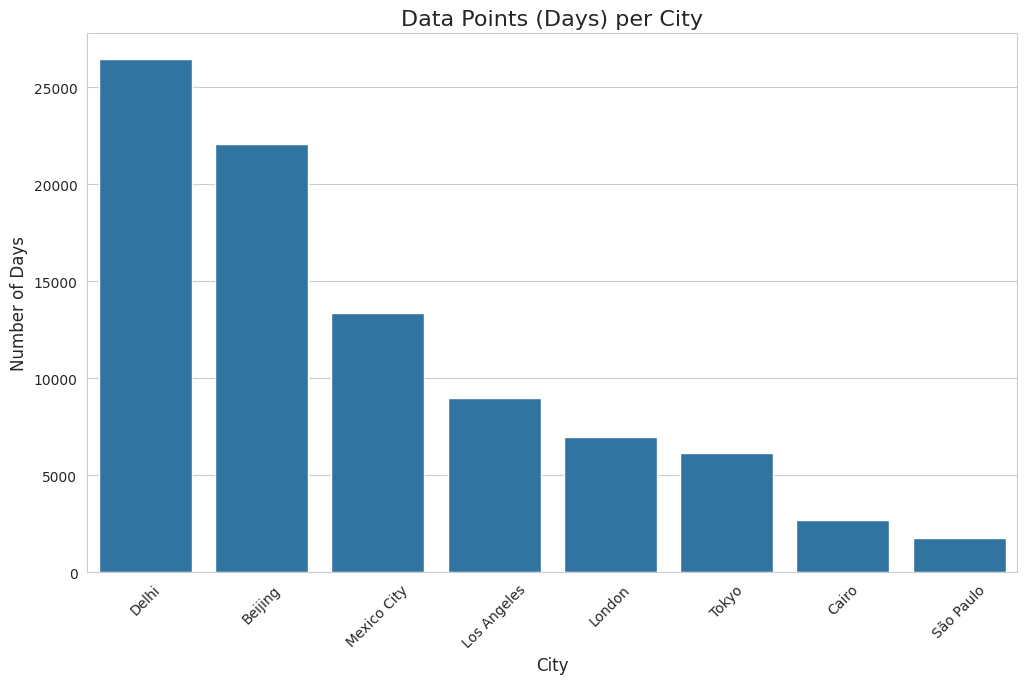


--- 🚀 Our 4 Federated Clients will be: ['Delhi', 'Beijing', 'Mexico City', 'Los Angeles'] ---

--- Analyzing Key Numerical Features ---
Plotting histograms...


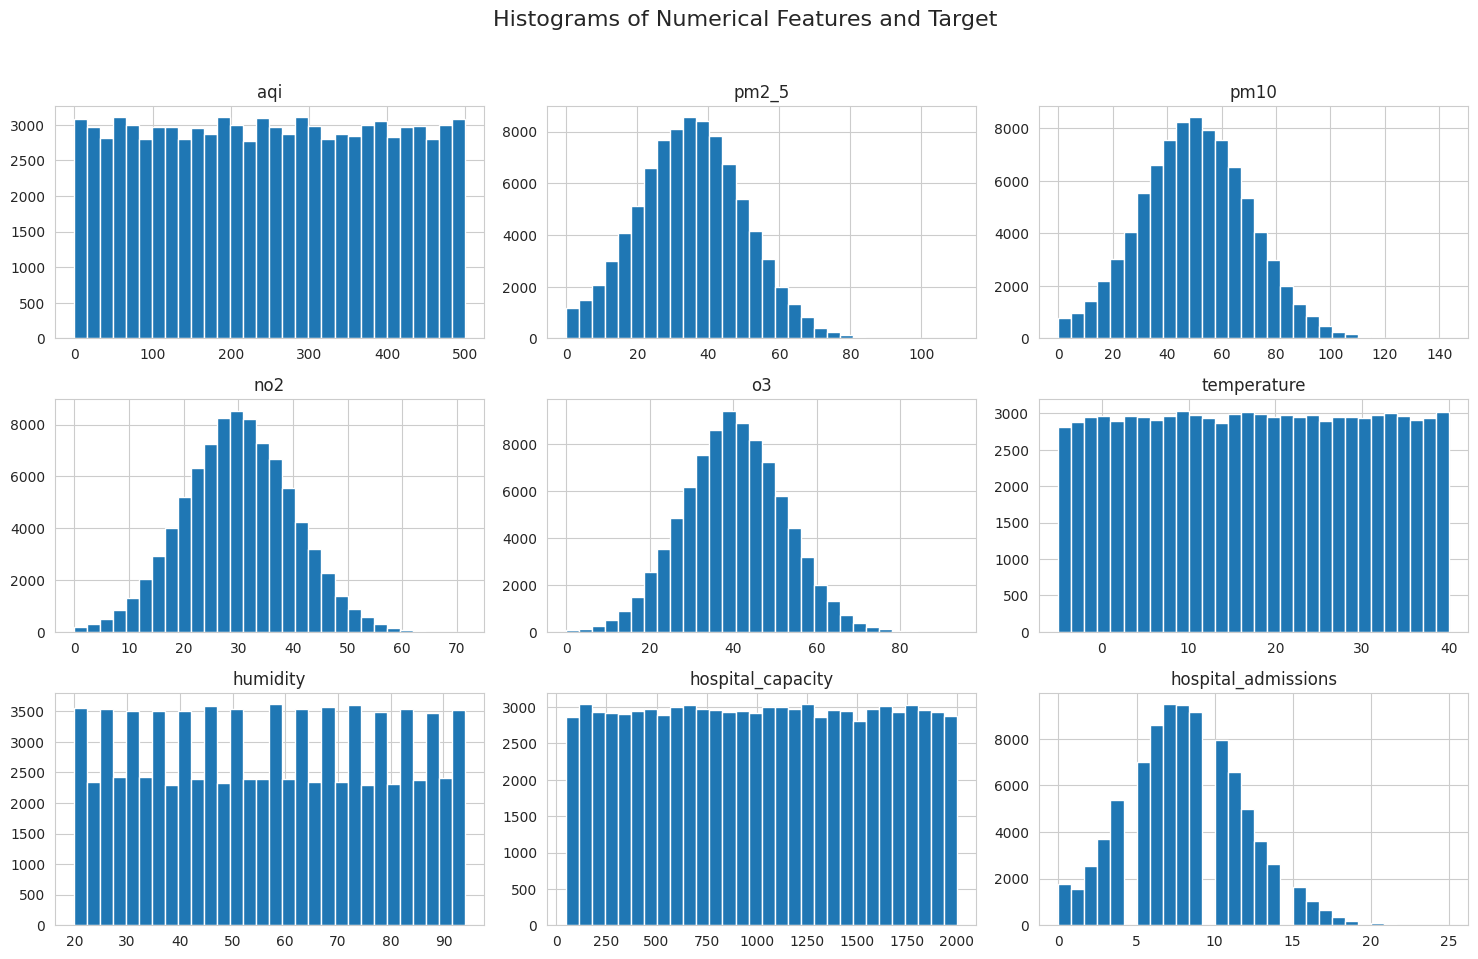


Plotting boxplots...


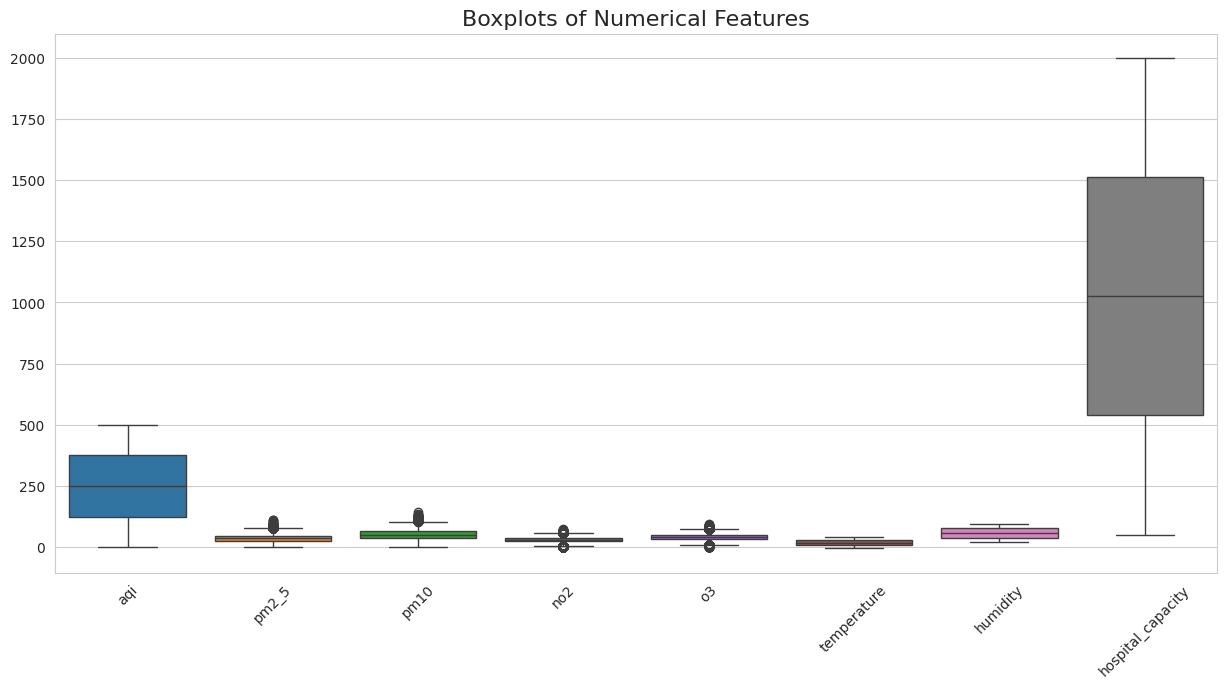

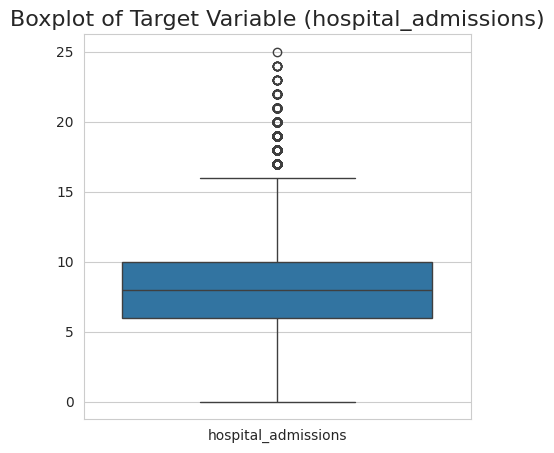


--- Analyzing Categorical 'Text' Feature ---
Value counts for 'population_density':
population_density
Urban       53192
Suburban    26465
Rural        8832
Name: count, dtype: int64


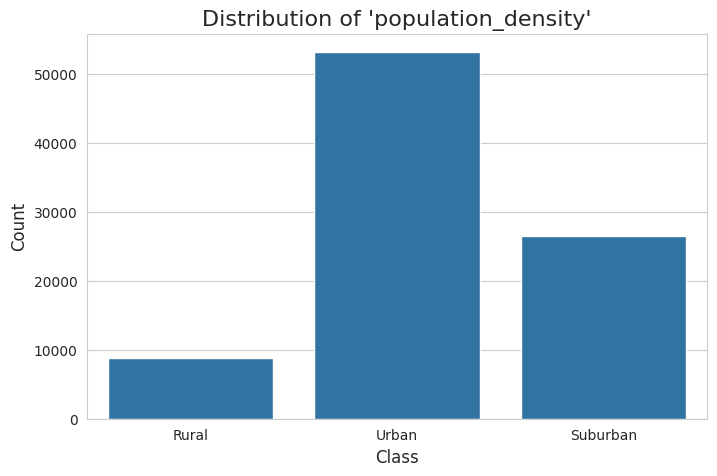


--- Correlation Heatmap ---


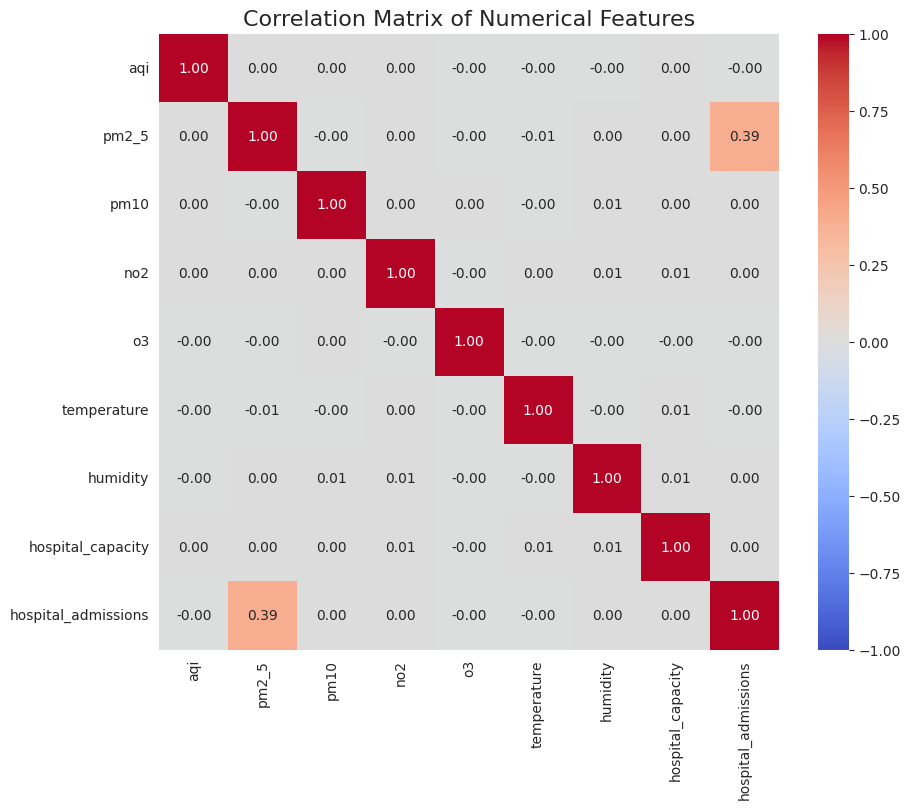


--- Correlation with Target (hospital_admissions) ---
hospital_admissions    1.000000
pm2_5                  0.392309
hospital_capacity      0.001533
no2                    0.001279
pm10                   0.000537
humidity               0.000010
aqi                   -0.000393
o3                    -0.003032
temperature           -0.003783
Name: hospital_admissions, dtype: float64

--- Plotting Time Series for our first client: Delhi ---


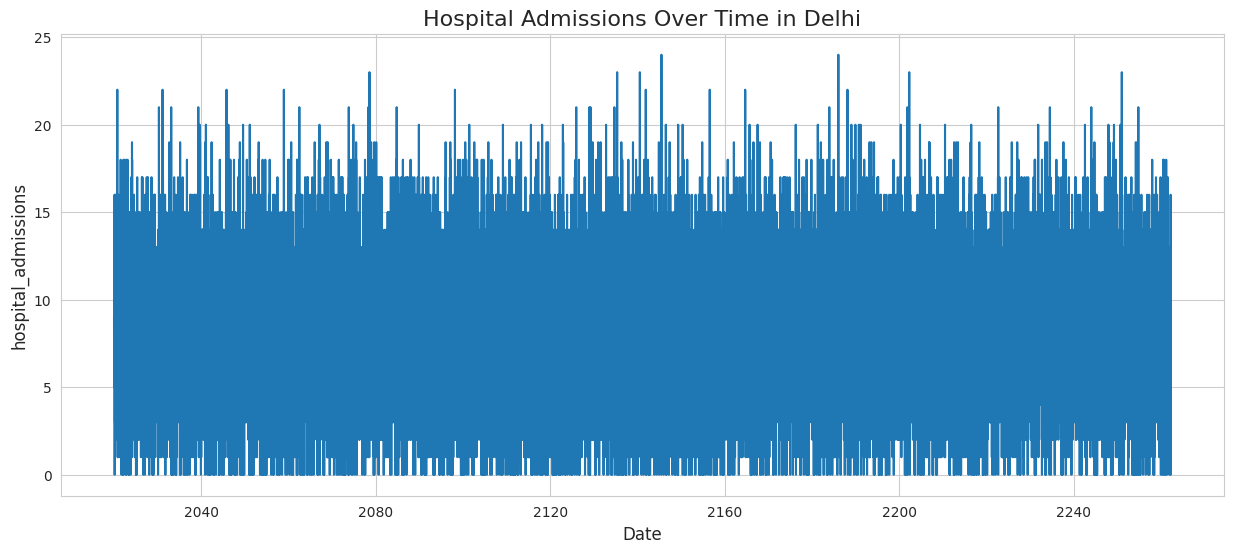


✅ EDA Complete: Project Plan Summary

1. Federated Clients:
   - We will use the 4 cities with the most data:
   - Client 1: Delhi (26465 days of data)
   - Client 2: Beijing (22064 days of data)
   - Client 3: Mexico City (13377 days of data)
   - Client 4: Los Angeles (9003 days of data)

2. Target Variable (Y):
   - Our model will predict: 'hospital_admissions'

3. Multi-Modal Features (X):
   - ✅ Time Series / Numerical Data:
      - ['aqi', 'pm2_5', 'pm10', 'no2', 'o3', 'temperature', 'humidity', 'hospital_capacity']
   - ✅ Text Data (for Embedding Layer):
      - 'population_density' (Categories: ['Rural', 'Urban', 'Suburban'])
   - ✅ Image Data (Simulated):
      - We will take our 8 numerical features...
      - ...and reshape them into a small 'image' (e.g., 2x4 pixels)...
      - ...to be fed into a 2D-CNN.

--- NEXT STEP: Phase 2 (Model Development) ---
We are now ready to build our multi-modal model and the Flower (flwr) federated learning system.


In [ ]:
# # ==============================================================================
# #
# #  MLOps Project: Federated Health Risk Prediction
# #  FILE: 1.0_EDA.ipynb
# #  PURPOSE: Load, inspect, and analyze the dataset to plan our
# #           Federated Learning (FL) client strategy and multi-modal model.
# #
# # ==============================================================================

# # --- Cell 1: Import Libraries ---
# # Import all the necessary libraries for data analysis and visualization.
# # ---
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import os

# # Set a style for our plots
# sns.set_style("whitegrid")
# print("Libraries imported successfully.")


# # --- Cell 2: Load the Dataset ---
# # Load the single CSV file that will power our entire project.
# # ---

# # Define the path to your data file
# DATA_FILE_PATH = '/content/MLOPs_data.csv'

# # Check if the file exists and load it
# if not os.path.exists(DATA_FILE_PATH):
#     print(f"--- ERROR ---")
#     print(f"File not found at '{DATA_FILE_PATH}'")
#     print("Please make sure you have downloaded the dataset and placed it in a 'data/' folder next to this notebook.")
# else:
#     print(f"\nLoading dataset from '{DATA_FILE_PATH}'...")

#     # --- THIS IS THE FIX ---
#     # We add encoding='latin1' to handle the non-UTF-8 characters
#     try:
#         df = pd.read_csv(DATA_FILE_PATH, encoding='latin1')
#         print("Dataset loaded successfully!")

#         # Display the first few rows to see what it looks like
#         print("\n--- First 5 Rows ---")
#         print(df.head())

#     except Exception as e:
#         print(f"--- ERROR loading CSV ---")
#         print(f"An error occurred: {e}")
#         print("Even with 'latin1' encoding, the file could not be read. Please check the file integrity.")

#     # Display the first few rows to see what it looks like
#     print("\n--- First 5 Rows ---")
#     print(df.head())


# # --- Cell 3: Initial Data Inspection ---
# # Get a high-level overview of our data: column names, data types, and missing values.
# # ---
# if 'df' in locals():
#     print("\n--- Dataset Info (Columns, Types, Non-Null Counts) ---")
#     df.info()

#     # We can see 'date' is an object (string), we should convert it to datetime
#     print("\nConverting 'date' column to datetime format...")
#     df['date'] = pd.to_datetime(df['date'])

#     print("\n--- Info After Date Conversion ---")
#     df.info()
# else:
#     print("\nDataset not loaded. Please fix Cell 2.")


# # --- Cell 4: Check for Missing Values ---
# # Let's see if we have any gaps in our data.
# # ---
# if 'df' in locals():
#     print("\n--- Missing Values Check (Sum per Column) ---")
#     missing_values = df.isnull().sum()
#     print(missing_values)

#     if missing_values.sum() == 0:
#         print("\n✅ Excellent! No missing values found in the dataset.")
#     else:
#         print("\nWarning: Missing values detected. We may need to fill or drop them.")
#         # For this project, we'll keep it simple and fill with the mean (if any)
#         # df = df.fillna(df.mean(numeric_only=True))
#         # print("Missing values filled with column mean.")
# else:
#     print("\nDataset not loaded. Please fix Cell 2.")


# # --- Cell 5: 🏆 CLIENT SELECTION (The Most Important Step) ---
# # We need to find out which cities have the most data.
# # These will become our "Local Clients" in the Federated Learning setup.
# # ---
# if 'df' in locals():
#     print("\n--- Data Distribution per City (Our 'Clients') ---")

#     city_counts = df['city'].value_counts()

#     print("Here's how many data points (days) we have for each city:")
#     print(city_counts)

#     # Let's visualize this
#     plt.figure(figsize=(12, 7))
#     sns.barplot(x=city_counts.index, y=city_counts.values)
#     plt.title('Data Points (Days) per City', fontsize=16)
#     plt.ylabel('Number of Days', fontsize=12)
#     plt.xlabel('City', fontsize=12)
#     plt.xticks(rotation=45)
#     plt.show()

#     # Based on the output, we'll select the top cities
#     # We will choose the top 4 (or 3, if the numbers drop off)
#     SELECTED_CITIES = city_counts.head(4).index.tolist()
#     print(f"\n--- 🚀 Our {len(SELECTED_CITIES)} Federated Clients will be: {SELECTED_CITIES} ---")
# else:
#     print("\nDataset not loaded. Please fix Cell 2.")


# # --- Cell 6: Numerical Feature Analysis (Time Series Data) ---
# # Let's understand the distribution of our key numerical features and the target variable.
# # ---
# if 'df' in locals():
#     print("\n--- Analyzing Key Numerical Features ---")

#     # Define our key features and the target
#     # We'll include all numerical sensor/weather data
#     numerical_features = ['aqi', 'pm2_5', 'pm10', 'no2', 'o3', 'temperature', 'humidity', 'hospital_capacity']
#     target = 'hospital_admissions'

#     # Ensure all columns exist before trying to plot
#     valid_numerical_features = [col for col in numerical_features if col in df.columns]

#     # Plot histograms
#     print("Plotting histograms...")
#     df[valid_numerical_features + [target]].hist(bins=30, figsize=(15, 12), layout=(4, 3))
#     plt.suptitle("Histograms of Numerical Features and Target", y=1.02, fontsize=16)
#     plt.tight_layout()
#     plt.show()

#     # Plot boxplots to see outliers
#     print("\nPlotting boxplots...")
#     plt.figure(figsize=(15, 7))
#     sns.boxplot(data=df[valid_numerical_features])
#     plt.title("Boxplots of Numerical Features", fontsize=16)
#     plt.xticks(rotation=45)
#     plt.show()

#     plt.figure(figsize=(5, 5))
#     sns.boxplot(data=df[[target]])
#     plt.title("Boxplot of Target Variable (hospital_admissions)", fontsize=16)
#     plt.show()
# else:
#     print("\nDataset not loaded. Please fix Cell 2.")


# # --- Cell 7: Categorical Feature Analysis (Our "Text" Data) ---
# # This is the feature we'll feed into our Embedding Layer.
# # ---
# if 'df' in locals():
#     print("\n--- Analyzing Categorical 'Text' Feature ---")

#     text_feature = 'population_density'

#     if text_feature in df.columns:
#         print(f"Value counts for '{text_feature}':")
#         print(df[text_feature].value_counts())

#         # Visualize it
#         plt.figure(figsize=(8, 5))
#         sns.countplot(data=df, x=text_feature)
#         plt.title(f"Distribution of '{text_feature}'", fontsize=16)
#         plt.ylabel("Count", fontsize=12)
#         plt.xlabel("Class", fontsize=12)
#         plt.show()
#     else:
#         print(f"\nWarning: The column '{text_feature}' was not found.")
#         text_feature = None # Set to None so we can check later
#         print("We will proceed without this 'text' feature for now.")
#         print("If your dataset has a different categorical column, update the 'text_feature' variable.")
# else:
#     print("\nDataset not loaded. Please fix Cell 2.")


# # --- Cell 8: Correlation Analysis ---
# # Let's see how our features relate to each other and, most importantly,
# # how they relate to our target variable 'hospital_admissions'.
# # ---
# if 'df' in locals():
#     print("\n--- Correlation Heatmap ---")

#     # Calculate correlations (only on numerical columns)
#     corr_matrix = df[valid_numerical_features + [target]].corr()

#     plt.figure(figsize=(10, 8))
#     sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
#     plt.title('Correlation Matrix of Numerical Features', fontsize=16)
#     plt.show()

#     # Show correlations with the target variable, sorted
#     print("\n--- Correlation with Target (hospital_admissions) ---")
#     target_corr = corr_matrix[target].sort_values(ascending=False)
#     print(target_corr)
# else:
#     print("\nDataset not loaded. Please fix Cell 2.")


# # --- Cell 9: Quick Time Series Plot ---
# # Let's plot our target variable over time for one of our selected clients.
# # ---
# if 'df' in locals() and 'SELECTED_CITIES' in locals() and len(SELECTED_CITIES) > 0:
#     print(f"\n--- Plotting Time Series for our first client: {SELECTED_CITIES[0]} ---")

#     # Filter data for the first client
#     client1_df = df[df['city'] == SELECTED_CITIES[0]].sort_values('date')

#     plt.figure(figsize=(15, 6))
#     plt.plot(client1_df['date'], client1_df[target])
#     plt.title(f"Hospital Admissions Over Time in {SELECTED_CITIES[0]}", fontsize=16)
#     plt.ylabel(target, fontsize=12)
#     plt.xlabel("Date", fontsize=12)
#     plt.show()
# else:
#     print("\nCould not run time series plot. Make sure Cells 2 and 5 ran successfully.")


# # --- Cell 10: Final Plan Summary ---
# # Summarize our findings from the EDA.
# # ---
# if 'df' in locals() and 'SELECTED_CITIES' in locals() and len(SELECTED_CITIES) > 0:
#     print("\n" + "="*50)
#     print("✅ EDA Complete: Project Plan Summary")
#     print("="*50)

#     print(f"\n1. Federated Clients:")
#     print(f"   - We will use the {len(SELECTED_CITIES)} cities with the most data:")
#     for i, city in enumerate(SELECTED_CITIES):
#         print(f"   - Client {i+1}: {city} ({city_counts[city]} days of data)")

#     print("\n2. Target Variable (Y):")
#     print(f"   - Our model will predict: '{target}'")

#     print("\n3. Multi-Modal Features (X):")
#     print("   - ✅ Time Series / Numerical Data:")
#     print(f"      - {valid_numerical_features}")

#     if text_feature:
#          print(f"   - ✅ Text Data (for Embedding Layer):")
#          print(f"      - '{text_feature}' (Categories: {df[text_feature].unique().tolist()})")
#     else:
#          print(f"   - ❌ Text Data: Not found. We will proceed without it.")

#     print(f"   - ✅ Image Data (Simulated):")
#     print(f"      - We will take our {len(valid_numerical_features)} numerical features...")
#     print(f"      - ...and reshape them into a small 'image' (e.g., 2x4 pixels)...")
#     print(f"      - ...to be fed into a 2D-CNN.")

#     print("\n--- NEXT STEP: Phase 2 (Model Development) ---")
#     print("We are now ready to build our multi-modal model and the Flower (flwr) federated learning system.")

# else:
#     print("\nCould not generate summary. Please run all previous cells successfully.")